## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  43.196967   809.915409  0.391963  10.417438  1.340785
1  90.922807   695.255055  0.940821   8.655834  1.628906
2  73.677341   726.538826  0.379942   3.439176  1.298466
3  68.473844   615.212359  0.791408   9.547527  1.350879
4  78.561842  1356.369764  0.923085   6.409106  1.684122


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9458599	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9377685	total: 70ms	remaining: 34.9s
2:	learn: 0.9304115	total: 70.5ms	remaining: 23.4s
3:	learn: 0.9219154	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9105217	total: 71.8ms	remaining: 14.3s
5:	learn: 0.9031259	total: 72.3ms	remaining: 12s
6:	learn: 0.8955356	total: 72.7ms	remaining: 10.3s
7:	learn: 0.8843579	total: 73.3ms	remaining: 9.09s
8:	learn: 0.8741929	total: 73.7ms	remaining: 8.12s
9:	learn: 0.8643308	total: 74.1ms	remaining: 7.34s
10:	learn: 0.8560921	total: 74.7ms	remaining: 6.71s
11:	learn: 0.8460374	total: 75.1ms	remaining: 6.18s
12:	learn: 0.8398492	total: 75.6ms	remaining: 5.74s
13:	learn: 0.8292571	total: 76ms	remaining: 5.36s
14:	learn: 0.8190070	total: 76.6ms	remaining: 5.03s
15:	learn: 0.8127588	total: 77.1ms	remaining: 4.74s
16:	learn: 0.8041229	total: 77.5ms	remaining: 4.48s
17:	learn: 0.7972013	total: 77.9ms	remaining: 4.25s
18:	learn: 0.7897934	total: 78.3ms	remaining: 4.04

87:	learn: 0.4445044	total: 108ms	remaining: 1.11s
88:	learn: 0.4419811	total: 108ms	remaining: 1.11s
89:	learn: 0.4389044	total: 109ms	remaining: 1.1s
90:	learn: 0.4364371	total: 109ms	remaining: 1.09s
91:	learn: 0.4337976	total: 109ms	remaining: 1.08s
92:	learn: 0.4314380	total: 110ms	remaining: 1.07s
93:	learn: 0.4288295	total: 110ms	remaining: 1.06s
94:	learn: 0.4256790	total: 110ms	remaining: 1.05s
95:	learn: 0.4228959	total: 111ms	remaining: 1.04s
96:	learn: 0.4204482	total: 111ms	remaining: 1.04s
97:	learn: 0.4190745	total: 112ms	remaining: 1.03s
98:	learn: 0.4164392	total: 112ms	remaining: 1.02s
99:	learn: 0.4138897	total: 113ms	remaining: 1.01s
100:	learn: 0.4116896	total: 113ms	remaining: 1s
101:	learn: 0.4091092	total: 113ms	remaining: 997ms
102:	learn: 0.4074575	total: 114ms	remaining: 990ms
103:	learn: 0.4039388	total: 114ms	remaining: 983ms
104:	learn: 0.4021335	total: 114ms	remaining: 976ms
105:	learn: 0.3997938	total: 115ms	remaining: 969ms
106:	learn: 0.3960445	total: 

274:	learn: 0.1820375	total: 186ms	remaining: 492ms
275:	learn: 0.1816313	total: 187ms	remaining: 491ms
276:	learn: 0.1810705	total: 188ms	remaining: 490ms
277:	learn: 0.1804311	total: 188ms	remaining: 488ms
278:	learn: 0.1796733	total: 188ms	remaining: 487ms
279:	learn: 0.1792570	total: 189ms	remaining: 485ms
280:	learn: 0.1785266	total: 189ms	remaining: 484ms
281:	learn: 0.1781366	total: 190ms	remaining: 483ms
282:	learn: 0.1777832	total: 190ms	remaining: 481ms
283:	learn: 0.1772824	total: 190ms	remaining: 480ms
284:	learn: 0.1769060	total: 191ms	remaining: 478ms
285:	learn: 0.1762191	total: 191ms	remaining: 477ms
286:	learn: 0.1758107	total: 192ms	remaining: 476ms
287:	learn: 0.1751400	total: 192ms	remaining: 475ms
288:	learn: 0.1746898	total: 192ms	remaining: 473ms
289:	learn: 0.1741731	total: 193ms	remaining: 472ms
290:	learn: 0.1734851	total: 193ms	remaining: 471ms
291:	learn: 0.1729449	total: 194ms	remaining: 470ms
292:	learn: 0.1725489	total: 194ms	remaining: 469ms
293:	learn: 

513:	learn: 0.0856193	total: 289ms	remaining: 273ms
514:	learn: 0.0854001	total: 290ms	remaining: 273ms
515:	learn: 0.0851853	total: 290ms	remaining: 272ms
516:	learn: 0.0848232	total: 291ms	remaining: 271ms
517:	learn: 0.0846144	total: 291ms	remaining: 271ms
518:	learn: 0.0844110	total: 291ms	remaining: 270ms
519:	learn: 0.0840012	total: 292ms	remaining: 269ms
520:	learn: 0.0838008	total: 292ms	remaining: 269ms
521:	learn: 0.0834769	total: 293ms	remaining: 268ms
522:	learn: 0.0831246	total: 293ms	remaining: 267ms
523:	learn: 0.0827862	total: 294ms	remaining: 267ms
524:	learn: 0.0825853	total: 294ms	remaining: 266ms
525:	learn: 0.0823884	total: 295ms	remaining: 265ms
526:	learn: 0.0820771	total: 295ms	remaining: 265ms
527:	learn: 0.0818842	total: 295ms	remaining: 264ms
528:	learn: 0.0816952	total: 296ms	remaining: 263ms
529:	learn: 0.0815100	total: 296ms	remaining: 263ms
530:	learn: 0.0809851	total: 297ms	remaining: 262ms
531:	learn: 0.0808045	total: 297ms	remaining: 261ms
532:	learn: 

691:	learn: 0.0452473	total: 368ms	remaining: 164ms
692:	learn: 0.0451435	total: 368ms	remaining: 163ms
693:	learn: 0.0449588	total: 369ms	remaining: 163ms
694:	learn: 0.0447624	total: 369ms	remaining: 162ms
695:	learn: 0.0445703	total: 370ms	remaining: 162ms
696:	learn: 0.0443920	total: 370ms	remaining: 161ms
697:	learn: 0.0441602	total: 370ms	remaining: 160ms
698:	learn: 0.0439736	total: 371ms	remaining: 160ms
699:	learn: 0.0437473	total: 371ms	remaining: 159ms
700:	learn: 0.0435626	total: 372ms	remaining: 158ms
701:	learn: 0.0433493	total: 372ms	remaining: 158ms
702:	learn: 0.0431293	total: 372ms	remaining: 157ms
703:	learn: 0.0430026	total: 373ms	remaining: 157ms
704:	learn: 0.0427867	total: 373ms	remaining: 156ms
705:	learn: 0.0427038	total: 374ms	remaining: 156ms
706:	learn: 0.0426221	total: 374ms	remaining: 155ms
707:	learn: 0.0424449	total: 375ms	remaining: 155ms
708:	learn: 0.0423215	total: 375ms	remaining: 154ms
709:	learn: 0.0421164	total: 376ms	remaining: 153ms
710:	learn: 

928:	learn: 0.0220104	total: 471ms	remaining: 36ms
929:	learn: 0.0219788	total: 472ms	remaining: 35.5ms
930:	learn: 0.0218848	total: 472ms	remaining: 35ms
931:	learn: 0.0218362	total: 473ms	remaining: 34.5ms
932:	learn: 0.0217668	total: 473ms	remaining: 34ms
933:	learn: 0.0217430	total: 474ms	remaining: 33.5ms
934:	learn: 0.0216511	total: 474ms	remaining: 33ms
935:	learn: 0.0216277	total: 474ms	remaining: 32.4ms
936:	learn: 0.0215800	total: 475ms	remaining: 31.9ms
937:	learn: 0.0214934	total: 475ms	remaining: 31.4ms
938:	learn: 0.0214258	total: 475ms	remaining: 30.9ms
939:	learn: 0.0213366	total: 476ms	remaining: 30.4ms
940:	learn: 0.0212896	total: 476ms	remaining: 29.9ms
941:	learn: 0.0212235	total: 477ms	remaining: 29.4ms
942:	learn: 0.0212004	total: 477ms	remaining: 28.8ms
943:	learn: 0.0211167	total: 478ms	remaining: 28.3ms
944:	learn: 0.0210707	total: 478ms	remaining: 27.8ms
945:	learn: 0.0209842	total: 478ms	remaining: 27.3ms
946:	learn: 0.0209333	total: 479ms	remaining: 26.8ms
9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

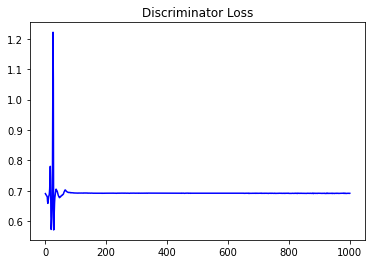

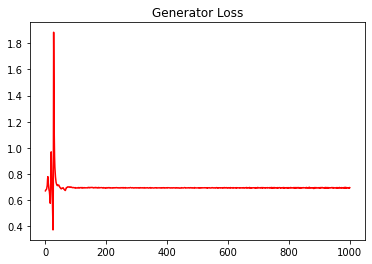

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4935424465886252


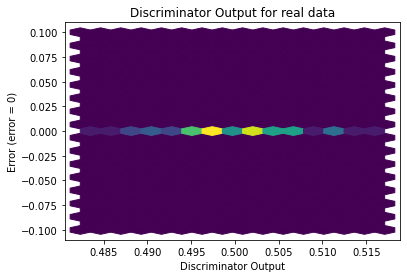

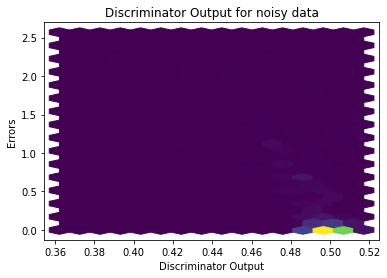

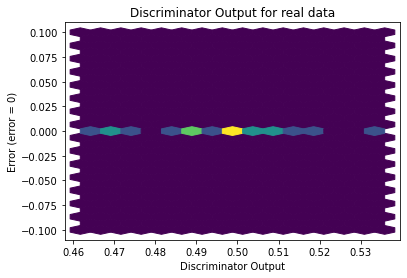

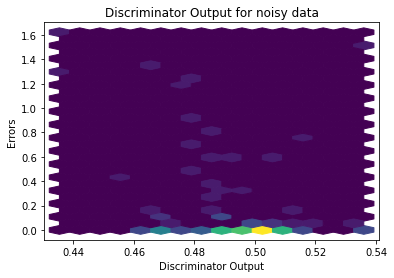

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


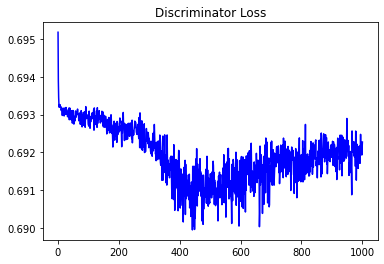

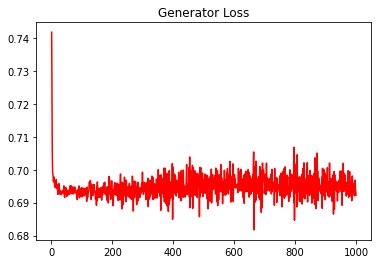

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5226571150341018


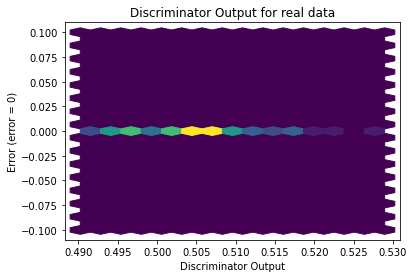

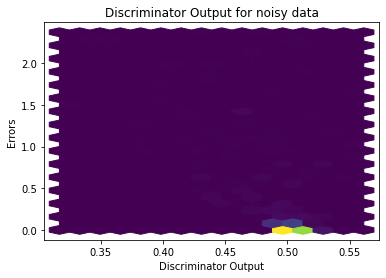

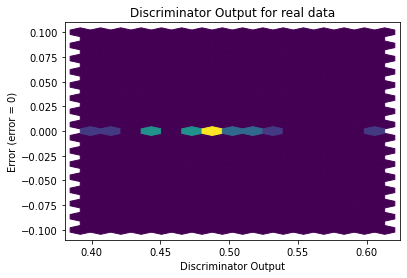

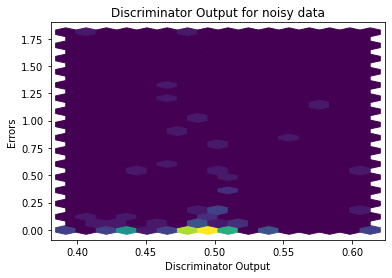

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2272]], requires_grad=True)
